# Visualizing The United States Real GDP Growth and Unemployment Rate

> Charts showing the U.S. GDP cycle and unemployment rate.

- toc: true
- badges: true
- comments: true
- author: David Ngo
- categories: [data visualization, economics, python]

I made a couple of simple charts, one to visualize the year-over-year Real Gross Domestic Product (GDP) growth in the United States and another for the rate of unemployment overtime. Data comes from the St. Louis Federal Reserve, Federal Reserve Economic Data.

By [year-over-year,](https://www.thebalance.com/year-over-year-yoy-growth-calculation-definition-3305970) I am comparing the GDP of one quarter with the same quarter in the previous year. For example, the growth rate of Real GDP in the first quarter of 2020 would be:

$$\%Growth_{2020} = \frac{GDP_{2020} - GDP_{2019}}{GDP_{2019}} \times 100$$



In [1]:
#hide_input
%%capture
# suppresses messages

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install fredapi

from fredapi import Fred
fred = Fred(api_key='6c0ecd6565503b64631fd2b36f71293a')
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#hide_input
GDP = fred.get_series('GDPC1') # Real Y
GDP_pct = GDP.pct_change(4).to_frame() # percent change of Real Y
GDP_pct.reset_index(level=0, inplace=True) # make dates a column
GDP_pct.columns = ['Date', 'GDP Pct'] # rename columns
GDP_pct['Date'] = GDP_pct['Date'].dt.strftime("%B %Y") # reformat dates
GDP_pct['GDP Pct']= GDP_pct['GDP Pct'] * 100 # scale gdp rate to percent
GDP_pct.drop(index=GDP_pct.index[0:4], axis=0, inplace=True) # drop na values

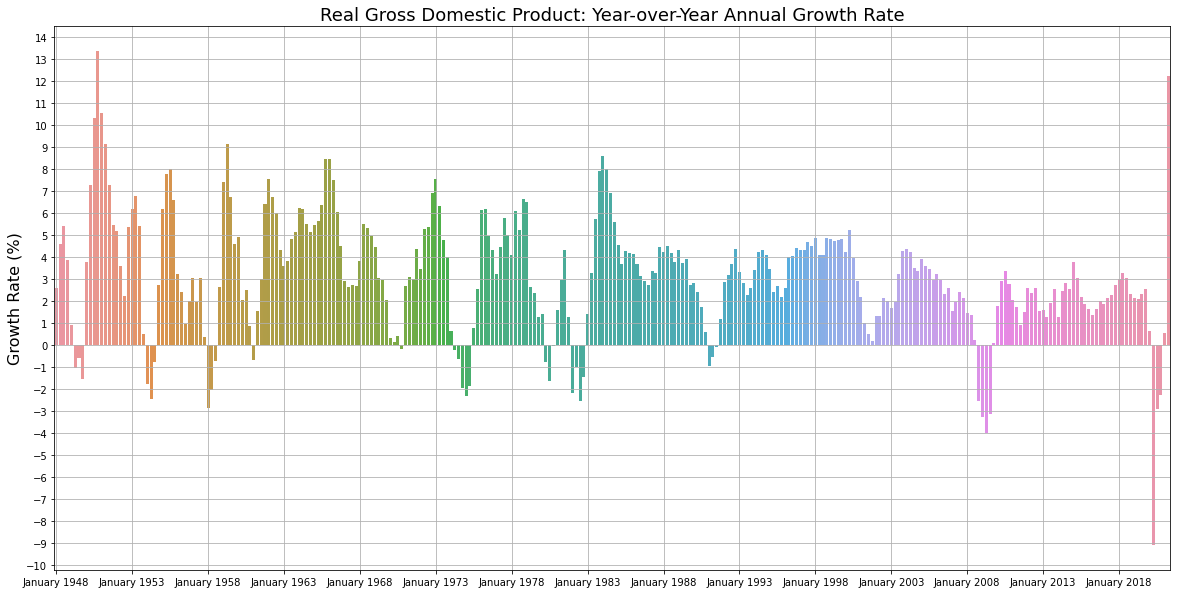

In [3]:
#hide_input
# Adjust the figure size
plt.figure(figsize=(20,10))
from scipy.interpolate import make_interp_spline

# Adjust fonts
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=16) 

# Create histogram
ax = plt.subplot()
sns.barplot(data = GDP_pct, x = "Date", y = "GDP Pct")

# Adjust x-ticks
plt.xticks(np.arange(0, len(GDP_pct)+1, 20))
ax.set_xticklabels(GDP_pct['Date'][0::20])

# Adjust y-ticks
plt.yticks(np.arange(-10,15))
           
# Customize labels
plt.title('Real Gross Domestic Product: Year-over-Year Annual Growth Rate')
plt.ylabel('Growth Rate (%)')
plt.xlabel('')

# Superimpose a grid
plt.grid(True)

# Print histogram
plt.show(ax)

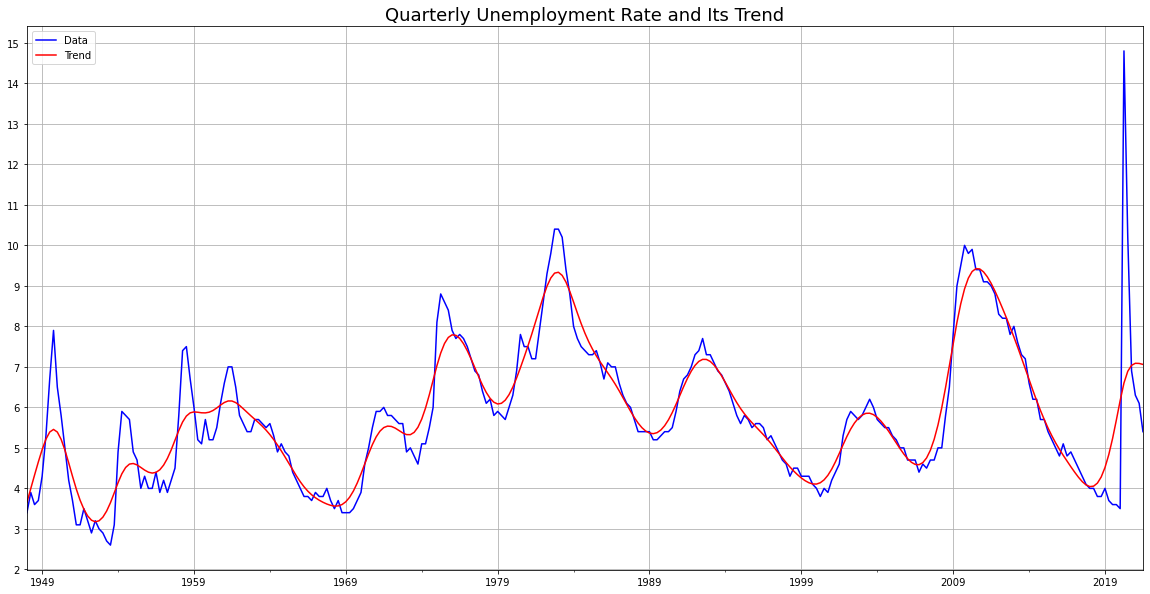

In [4]:
#hide_input
plt.rcParams['figure.figsize'] = (20,10)
Umonth = fred.get_series('UNRATE') #monthly not quarterly, will need to transform.  These data start in Jan 1948
UNRATE = Umonth.resample('Q').first()
(UNRATE).plot(color='blue')
UNRATE_cycle, UNRATE_trend = sm.tsa.filters.hpfilter(UNRATE, 80)
UNRATE_trend.plot(color='red')
plt.title('Quarterly Unemployment Rate and Its Trend')
plt.legend(['Data', 'Trend'])
plt.grid(True)
plt.yticks(np.arange(2,16))
plt.show()